# Objective

# 1. Membuat model untuk prediksi loan_status/Loan_ending

Tujuan kami adalah untuk memprediksi apakah suatu pinjaman berisiko atau tidak. Oleh karena itu, penting untuk mengetahui status akhir dari setiap pinjaman secara historis, apakah itu dalam kondisi macet (defaulted/charged off) atau sudah dilunasi sepenuhnya (fully paid). Terdapat juga nilai-nilai yang ambigu seperti "Saat ini" (Current) dan "Dalam Masa Tenggang" (In Grace Period). Oleh karena itu, kita tidak bisa menggunakan status-status tersebut sebagai acuan. Terlambat (Late) juga memiliki ambiguitas, tetapi pribadi saya tidak ingin berinvestasi dalam pinjaman yang terlambat, jadi saya akan mengklasifikasikannya sebagai pinjaman macet.

Klasifikasi akhir pinjaman akan dilakukan sebagai berikut:

Pinjaman baik: ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]
Pinjaman berisiko: ["Charged Off", "Late (31-120 days)", "Late (16-30 days)", "Default", "Does not meet the credit policy. Status:Charged Off"]

# 2. Memberikan bussiness insight

- class dari peminjam (Grade) dan memiliki status (Verification Status) apa yang meiliki nilai terbanyak> 
    
     - mencari tahu jumlah pinjaman terbanyak memiliki rumah dengan kategory apa?
    
     - mencari trend dari total pinjaman yang telah diberikan breakdown dengan status pinjaman (year)?  
    
     - mencari tahu negara bagian mana yang memiliki total peminjam terbanyak dengan status terverifikasi?

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [84]:
df = pd.read_csv("loan_data_2007_2014.csv")

In [85]:
df.head(7)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
print('jumlah baris dari dataset ini %d dan jumlah kolomnya %d'%df.shape)

jumlah baris dari dataset ini 466285 dan jumlah kolomnya 75


In [87]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Handling Missing Value and Duplicates

In [89]:
#checing the missing values(%)
def chek_missing(df):
    sum_NAN = df.isnull().sum().reset_index()
    sum_NAN.columns = ['Columns', 'NaN_count']
    sum_NAN["Percentage"] = sum_NAN.NaN_count/len(df)*100
    return sum_NAN.sort_values("Percentage", ascending =  False)
chek_missing(df)

,Columns,NaN_count,Percentage
74,inq_last_12m,466285,100.0
65,total_bal_il,466285,100.0
55,dti_joint,466285,100.0
56,verification_status_joint,466285,100.0
54,annual_inc_joint,466285,100.0
...,...,...,...
39,total_pymnt,0,0.0
40,total_pymnt_inv,0,0.0
41,total_rec_prncp,0,0.0
42,total_rec_int,0,0.0


In [90]:
missing = chek_missing(df)

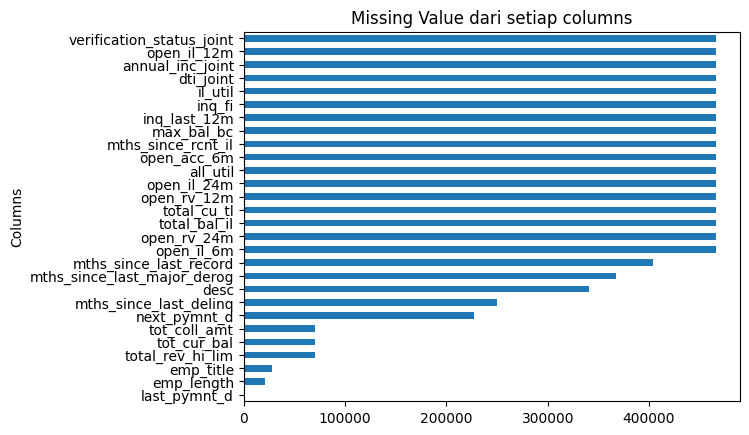

In [91]:
missing.head(28).groupby(["Columns"]).NaN_count.sum().sort_values(ascending=True).plot.barh()
plt.title("Missing Value dari setiap columns")
plt.show()

In [92]:
drop_cols=['mths_since_last_major_derog','mths_since_last_record','annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
           'inq_fi', 'total_cu_tl', 'inq_last_12m','desc','mths_since_last_delinq','next_pymnt_d','id', 'Unnamed: 0']
df2 = df.drop(drop_cols, axis=1)

In [93]:
#checing the missing values(%)
def chek_missing(df):
    sum_NAN = df.isnull().sum().reset_index()
    sum_NAN.columns = ['Columns', 'NaN_count']
    sum_NAN["Percentage"] = sum_NAN.NaN_count/len(df)*100
    return sum_NAN.sort_values("Percentage", ascending =  False)
missing2 = chek_missing(df2)
missing2.head(15)

,Columns,NaN_count,Percentage
48,total_rev_hi_lim,70276,15.071469
47,tot_coll_amt,70276,15.071469
9,emp_title,27588,5.916553
10,emp_length,21008,4.505399
41,last_pymnt_d,376,0.080637
29,revol_util,340,0.072917
44,collections_12_mths_ex_med,145,0.031097
43,last_credit_pull_d,42,0.009007
23,delinq_2yrs,29,0.006219
30,total_acc,29,0.006219


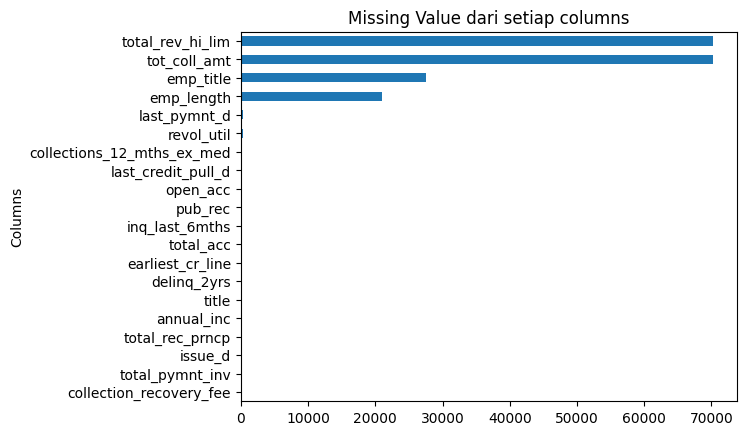

In [94]:
missing2.head(20).groupby(["Columns"]).NaN_count.mean().sort_values(ascending=True).plot.barh()
plt.title("Missing Value dari setiap columns")
plt.show()

# Cleaning/Feature Engineering

In [95]:
modus = df2['emp_title'].mode()[0]
df2['emp_title'] = df2['emp_title'].fillna(modus)
modus2 = df2['last_pymnt_d'].mode()[0]
df2['last_pymnt_d'] = df2['last_pymnt_d'].fillna(modus2)

In [96]:
df2.emp_length.unique

<bound method Series.unique of 0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
466280      4 years
466281    10+ years
466282      7 years
466283      3 years
466284    10+ years
Name: emp_length, Length: 466285, dtype: object>

In [97]:
df2['emp_length'] = df2['emp_length'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [98]:
rata = df2['emp_length'].mode()[0]
df2['emp_length'] = df2['emp_length'].fillna(rata)
df2.emp_length

0         10.0
1          1.0
2         10.0
3         10.0
4          1.0
          ... 
466280     4.0
466281    10.0
466282     7.0
466283     3.0
466284    10.0
Name: emp_length, Length: 466285, dtype: float64

In [99]:
df3 = df2.dropna()

In [100]:
df3.isna().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

In [101]:
print(f'Duplicates in dataframe:{df3.iloc[:,1:].duplicated().sum()}, ({np.round(100*df3.iloc[:,1:].duplicated().sum()/len(df3),1)}%)')

Duplicates in dataframe:0, (0.0%)


In [102]:
print('Jumlah baris dari dataset sekarang %d dan jumlah kolomnya %d'%df3.shape)

Jumlah baris dari dataset sekarang 395745 dan jumlah kolomnya 49


In [103]:
df3.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,tot_coll_amt,total_rev_hi_lim
42535,12000897,27050,27050,27050.0,36 months,10.99,885.46,B,B2,Team Leadern Customer Ops & Systems,...,0.0,0.0,Jan-16,885.46,Dec-15,0.0,1,INDIVIDUAL,0.0,59900.0
42536,12011200,9750,9750,9750.0,36 months,13.98,333.14,C,C1,Medical Assistant,...,0.0,0.0,Jan-16,333.14,Jan-16,0.0,1,INDIVIDUAL,0.0,15100.0
42537,1319523,12000,12000,12000.0,36 months,6.62,368.45,A,A2,MANAGER INFORMATION DELIVERY,...,0.0,0.0,Jan-16,368.45,Jan-16,0.0,1,INDIVIDUAL,0.0,61100.0
42538,11991209,12000,12000,12000.0,36 months,13.53,407.40,B,B5,On road manager,...,0.0,0.0,Sep-15,119.17,Jan-16,0.0,1,INDIVIDUAL,15386.0,8100.0
42539,12011167,15000,15000,15000.0,36 months,8.90,476.30,A,A5,aircraft maintenance engineer,...,0.0,0.0,Jan-16,476.30,Jan-16,0.0,1,INDIVIDUAL,1514.0,15400.0


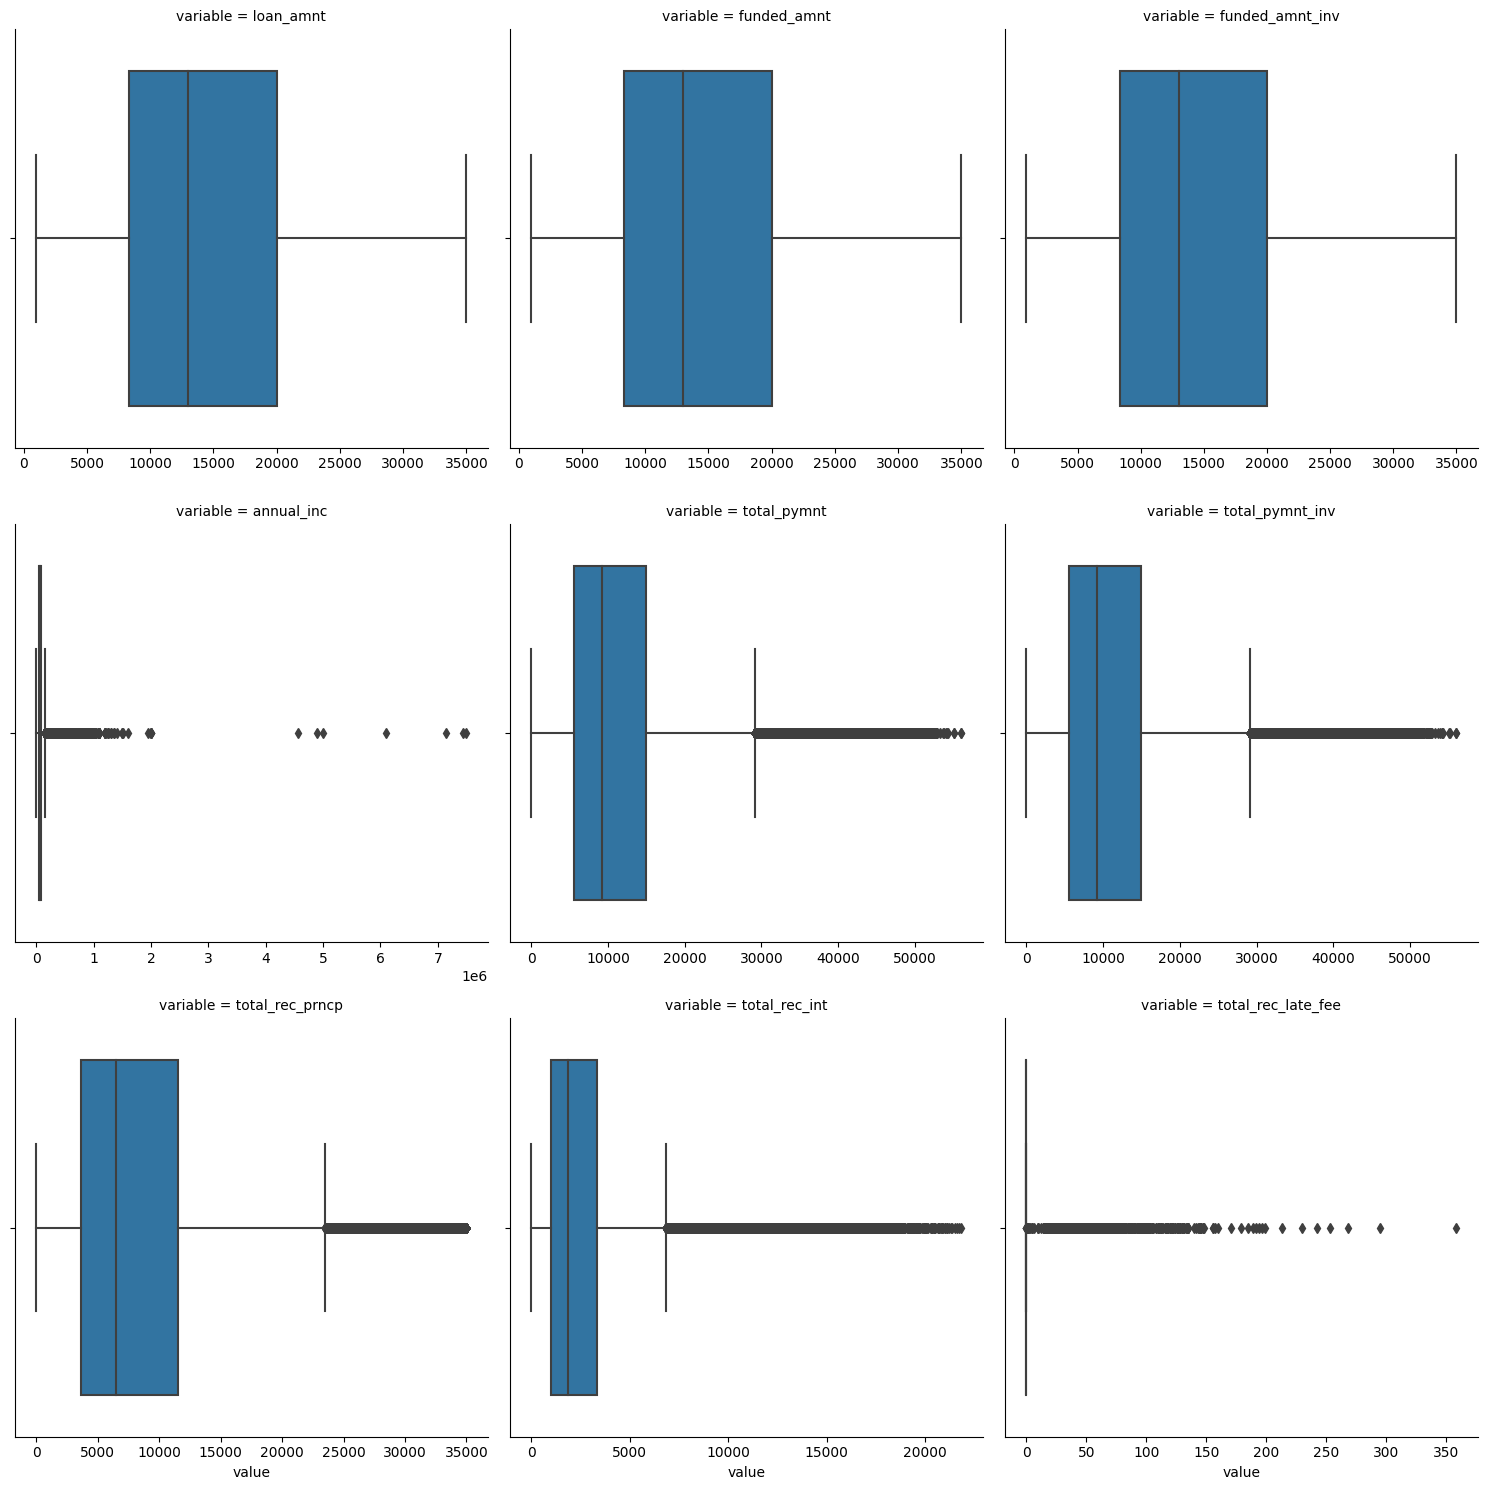

In [104]:
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3, 
                      sharex=False, sharey=False, height= 5)
    g = g.map(types, "value")
    plt.show()
    return (g)
import warnings
warnings.filterwarnings('ignore')
#plots outliers
viz(df3[['loan_amnt', 'funded_amnt','funded_amnt_inv', 'annual_inc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee']], sns.boxplot)

# Defining Variable 

In [105]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [106]:
#define values
ambiguous = ['Current', 'In Grace Period']
good =  ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

#drop rows that contain ambiguous ending
df3 = df3[df3.loan_status.isin(ambiguous) == False]

#create new column to classify ending
df3['loan_ending'] = np.where(df3['loan_status'].isin(good), 'good', 'bad')

<Axes: title={'center': 'good vs risky loans balance'}>

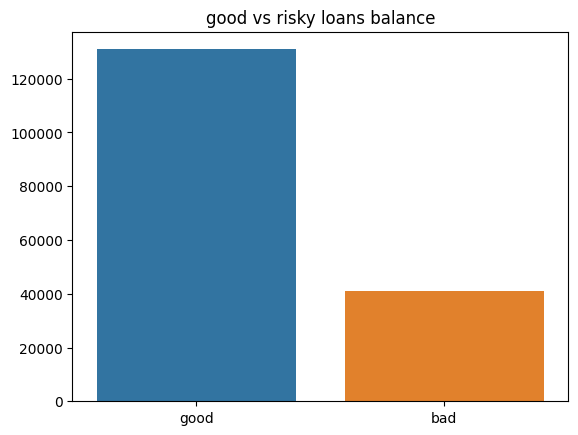

In [107]:
# check the balance
plt.title('good vs risky loans balance')
sns.barplot(x=df3.loan_ending.value_counts().index,y=df3.loan_ending.value_counts().values)

# Visualization 

# cleaning

In [108]:
df3['earliest_cr_line'].head() #supposed to be date

42538    Oct-98
42544    May-91
42546    Nov-94
42549    Jan-89
42550    Jul-91
Name: earliest_cr_line, dtype: object

In [109]:
df3['earliest_cr_line'] = pd.to_datetime(df3['earliest_cr_line'], format='%b-%y')

In [110]:
df3['earliest_cr_line'].head()

42538   1998-10-01
42544   1991-05-01
42546   1994-11-01
42549   1989-01-01
42550   1991-07-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [111]:
(pd.to_datetime('2017-12-01') - df3['earliest_cr_line'])

42538     7001 days
42544     9711 days
42546     8431 days
42549    10561 days
42550     9650 days
            ...    
466276    8431 days
466277    7093 days
466278    5662 days
466281    7488 days
466283    5417 days
Name: earliest_cr_line, Length: 172157, dtype: timedelta64[ns]

ubah menjadi bulan agar lebih nyaman

In [112]:
df3['mths_since_earliest_cr_line'] = round((pd.to_numeric((pd.to_datetime('2017-12-01') - df3['earliest_cr_line'])/np.timedelta64(1, 'M'))))

In [113]:
df3['mths_since_earliest_cr_line']

42538     230.0
42544     319.0
42546     277.0
42549     347.0
42550     317.0
          ...  
466276    277.0
466277    233.0
466278    186.0
466281    246.0
466283    178.0
Name: mths_since_earliest_cr_line, Length: 172157, dtype: float64

In [114]:
df3['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [115]:
df3['term'] = df3['term'].str.replace(' ', '')
df3['term'] = df3['term'].str.replace('months', '')

In [116]:
df3['term'] = pd.to_numeric(df3['term'])

In [117]:
df3['issue_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [118]:
df3.issue_date.head()

42538   2013-12-01
42544   2013-12-01
42546   2013-12-01
42549   2013-12-01
42550   2013-12-01
Name: issue_date, dtype: datetime64[ns]

In [119]:
df3['mths_since_issue_date'] = round((pd.to_numeric((pd.to_datetime('2017-01-01')-df3['issue_date'])/np.timedelta64(1, 'M'))))

In [120]:
feature = df3[['emp_length','loan_ending','mths_since_earliest_cr_line','issue_date','term']]
feature

,emp_length,loan_ending,mths_since_earliest_cr_line,issue_date,term
42538,10.0,good,230.0,2013-12-01,36
42544,10.0,good,319.0,2013-12-01,36
42546,5.0,good,277.0,2013-12-01,36
42549,10.0,good,347.0,2013-12-01,36
42550,2.0,bad,317.0,2013-12-01,36
...,...,...,...,...,...
466276,5.0,bad,277.0,2014-01-01,60
466277,3.0,bad,233.0,2014-01-01,36
466278,10.0,good,186.0,2014-01-01,36
466281,10.0,bad,246.0,2014-01-01,60


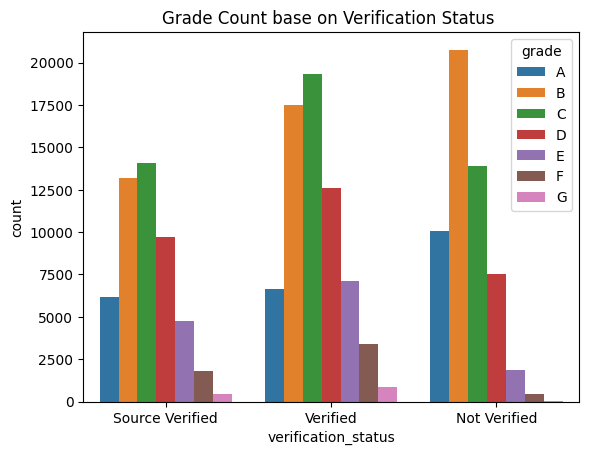

In [121]:
sns.countplot(x=df3.verification_status,hue=df3.grade.sort_values())
plt.title('Grade Count base on Verification Status ')
plt.show()

berdasarkan keterangan grafik diatas dapat terlihat bahwa masih banyak grade B yang masih terbilang bagus namum tidak dapat diverifikasi Lending Club

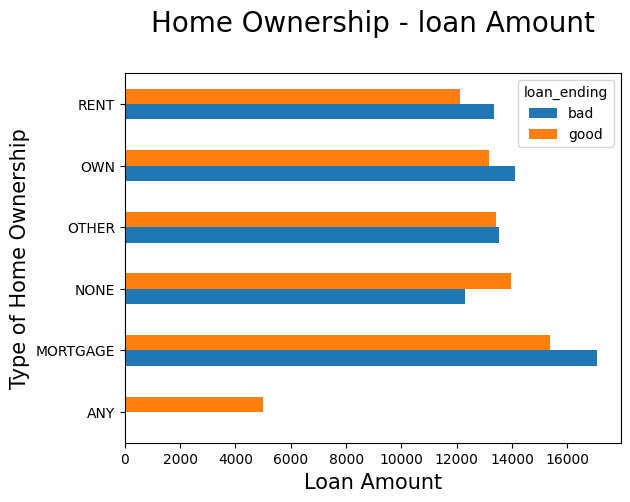

In [122]:
#Home own vs Loan Amount
df3.groupby(["home_ownership","loan_ending"]).loan_amnt.mean().sort_values(ascending=False).unstack().plot.barh()
plt.title('Home Ownership - loan Amount', loc='center',pad=30, fontsize=20, color='black')
plt.xlabel('Loan Amount', fontsize=15)
plt.ylabel('Type of Home Ownership', fontsize = 15)
plt.show()

dapat dilihat berdasarkan grafik jumlah peminjam terbesar ada pada prang-orang yang memiliki hipotek.

<Figure size 640x480 with 0 Axes>

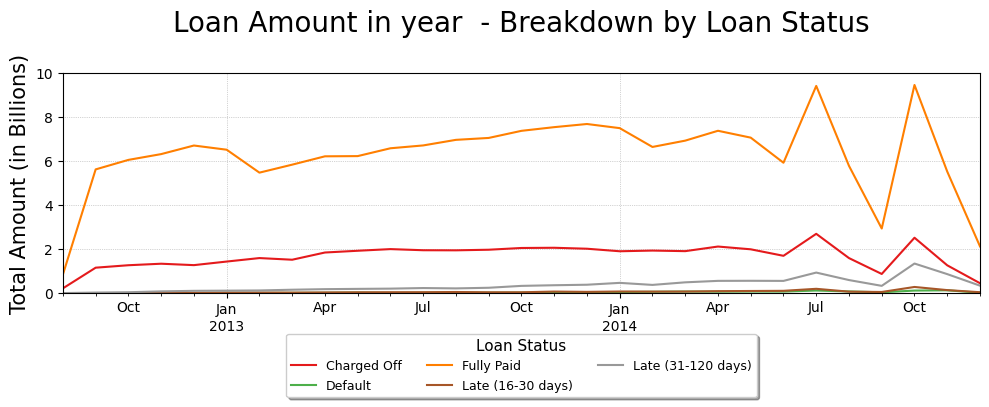

In [123]:
plt.clf()
df3.groupby(['issue_date','loan_status'])['loan_amnt'].sum().unstack().plot(cmap='Set1')
plt.title('Loan Amount in year  - Breakdown by Loan Status', loc='center',pad=30, fontsize=20, color='black')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth = 0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Loan Status', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

In [124]:
states = {"AL":"Alabama", "AK":"Alaska", "AZ":"Arizona", "AR":"Arkansas", "CA":"California", "CO":"Colorado", "CT":"Connecticut", 
          "DC":"Washington DC", "DE":"Delaware", "FL":"Florida", "GA":"Georgia", "HI":"Hawaii", "ID":"Idaho", "IL":"Illinois", 
          "IN":"Indiana", "IA":"Iowa", "KS":"Kansas", "KY":"Kentucky", "LA":"Louisiana", "ME":"Maine", "MD":"Maryland",
          "MA":"Massachusetts", "MI":"Michigan", "MN":"Minnesota", "MS":"Mississippi", "MO":"Missouri", "MT":"Montana",
          "NE":"Nebraska", "NV":"Nevada", "NH":"New Hampshire", "NJ":"New Jersey", "NM":"New Mexico", "NY":"New York", 
          "NC":"North Carolina", "ND":"North Dakota", "OH":"Ohio", "OK":"Oklahoma", "OR":"Oregon", "PA":"Pennsylvania", 
          "RI":"Rhode Island", "SC":"South Carolina", "SD":"South Dakota", "TN":"Tennessee", "TX":"Texas", "UT":"Utah", "VT":"Vermont",
          "VA":"Virginia", "WA":"Washington", "WV":"West Virginia","WI":"Wisconsin", "WY":"Wyoming"}
 
df3["States_long"] = df3.addr_state.map(states)

In [125]:
df3.States_long.unique()

array(['New Mexico', 'Florida', 'California', 'Michigan', 'Colorado',
       'New York', 'Texas', 'Pennsylvania', 'Ohio', 'Massachusetts',
       'New Jersey', 'North Carolina', 'South Carolina', 'Delaware',
       'Missouri', 'Minnesota', 'Illinois', 'Washington', 'Wyoming',
       'Maryland', 'Tennessee', 'Nevada', 'Georgia', 'Kansas', 'Arizona',
       'New Hampshire', 'Rhode Island', 'Virginia', 'Connecticut',
       'West Virginia', 'Louisiana', 'Vermont', 'Indiana', 'Oklahoma',
       'Arkansas', 'Wisconsin', 'Kentucky', 'Alabama', 'Utah', 'Alaska',
       'South Dakota', 'Oregon', 'Hawaii', 'Washington DC', 'Montana',
       'Nebraska', 'Iowa', 'Mississippi', 'Maine'], dtype=object)

In [126]:
df3.verification_status.unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [127]:
us_data = df3[df3["verification_status"]=='Verified']['addr_state'].value_counts().reset_index()
us_data.columns=['State','No of people']
us_data.head()

,State,No of people
0,CA,11647
1,NY,5382
2,TX,5254
3,FL,4379
4,NJ,2606


In [128]:
%pip install plotly_express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
  Using cached statsmodels-0.14.0-cp311-cp311-win_amd64.whl (9.2 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [129]:
import plotly.express as px
fig = px.choropleth(us_data,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='No of people',
                    color_continuous_scale="Viridis_r", 
                    title="Jumlah Orang yang Melakukan Pinjaman dengan Status Terverifikasi ",labels=True,
                    hover_name= 'No of people'
                    )
fig.show()

Jumlah peminjam terbanyak yang telah terverifikasi ada di CA=California 11.647K

# Preprocessing

# Variabel yang agak tidak jelas

Kolom menarik lainnya adalah tot_coll_amt, tot_cur_bal, total_rev_hi_lim. Mereka adalah tiga kolom terakhir, dan memiliki jumlah nilai bukan nol yang sama. Saya berasumsi bahwa itu adalah fitur baru dalam beberapa waktu antara 2007 - 2014, begitu banyak nilai yang masih nol, terutama yang lebih lama. Deskripsi kolom-kolom ini juga tidak jelas, jadi saya agak tidak yakin apakah datanya mengandung kebocoran atau tidak. Pertama-tama kita akan mencoba menjelajahi kolom-kolom ini lebih lanjut, sehingga kita dapat memutuskan apa yang harus dilakukan.

In [130]:
cols = ['tot_coll_amt', 'total_rev_hi_lim']

# pivot table aggregated by mean
print(pd.pivot_table(df3, index = 'loan_ending', values = cols))

# pivot table aggregated by max value
print(pd.pivot_table(df3, index = 'loan_ending', values = cols, aggfunc = np.max))

             tot_coll_amt  total_rev_hi_lim
loan_ending                                
bad            141.061397      26266.841799
good           219.864765      30005.283902
             tot_coll_amt  total_rev_hi_lim
loan_ending                                
bad               95806.0         1998700.0
good            9152545.0         2013133.0


In [131]:
# berdasarkan tabel pivot, tot_coll_amt agak mencurigakan, mari kita periksa
df3[cols].describe()

,tot_coll_amt,total_rev_hi_lim
count,1.721570e+05,1.721570e+05
mean,2.010026e+02,2.911046e+04
std,2.211861e+04,2.853131e+04
min,0.000000e+00,1.000000e+02
25%,0.000000e+00,1.320000e+04
50%,0.000000e+00,2.200000e+04
75%,0.000000e+00,3.620000e+04
max,9.152545e+06,2.013133e+06


<Axes: xlabel='tot_coll_amt', ylabel='Density'>

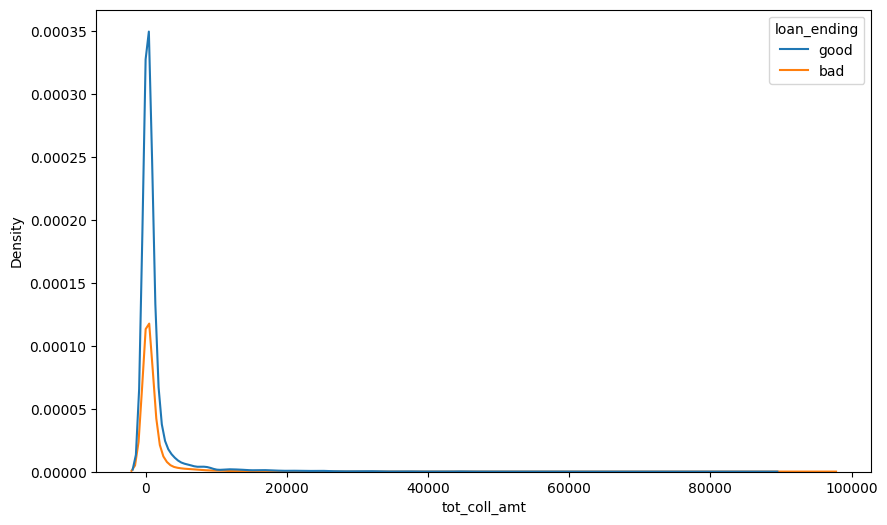

In [132]:
plt.figure(figsize=(10,6))

# Saya menggunakan "> 0" karena 75% datanya adalah 0 ... jadi plot di bawah ini hanya menggunakan < 25% dari datanya
sns.kdeplot(data = df3[(df3['tot_coll_amt'] < 100000) & (df3['tot_coll_amt'] > 0)], x='tot_coll_amt', hue='loan_ending')

<Axes: xlabel='total_rev_hi_lim', ylabel='Density'>

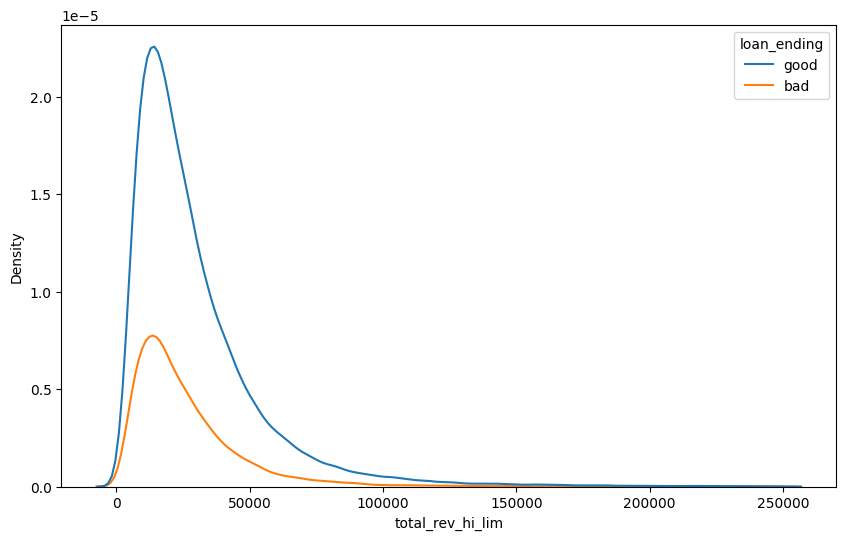

In [133]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df3[df3['total_rev_hi_lim'] < 250000], x='total_rev_hi_lim', hue='loan_ending')

In [134]:
drop_col = ['tot_coll_amt', 'total_rev_hi_lim', 'States_long', 'zip_code', 'last_pymnt_d','last_credit_pull_d']
df3.drop(drop_col, inplace=True, axis = 1)

# Variabel dengan kategori sedikit

In [135]:
# Filtering data with less than 8 unique values
df3.nunique()[df3.nunique() < 8].sort_values()

policy_code                   1
application_type              1
term                          2
pymnt_plan                    2
initial_list_status           2
loan_ending                   2
verification_status           3
loan_status                   5
home_ownership                6
grade                         7
collections_12_mths_ex_med    7
dtype: int64

In [136]:
drop_col = ['policy_code', 'application_type']
df3.drop(drop_col, inplace=True, axis = 1)

Untuk data dengan nilai unik yang kecil, kita dapat menelusurinya secara visual dengan menggunakan bad loan untuk setiap kategori.

In [137]:
print(df3.nunique()[df3.nunique() < 8].sort_values().index)

Index(['term', 'pymnt_plan', 'initial_list_status', 'loan_ending',
       'verification_status', 'loan_status', 'home_ownership', 'grade',
       'collections_12_mths_ex_med'],
      dtype='object')


In [138]:
def risk_pct_chart(x):
    ratio = (df3.groupby(x)['loan_ending'] # group by
         .value_counts(normalize=True) # calculate the ratio
         .mul(100) # multiply by 100 to be percent
         .rename('risky_pct') # rename column as percent
         .reset_index())

    sns.lineplot(data=ratio[ratio['loan_ending'] == 'bad'], x=x, y='risky_pct')
    plt.title(x)
    plt.show()

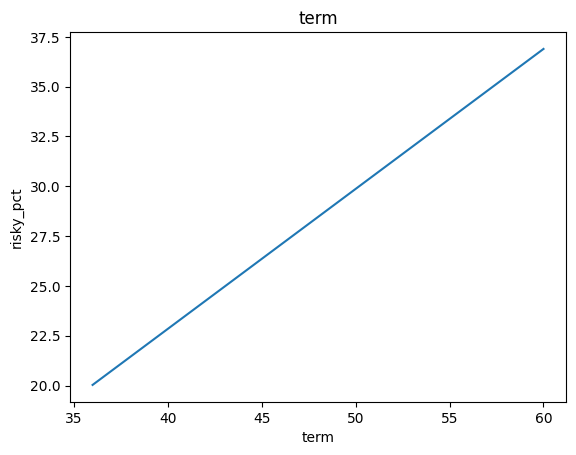

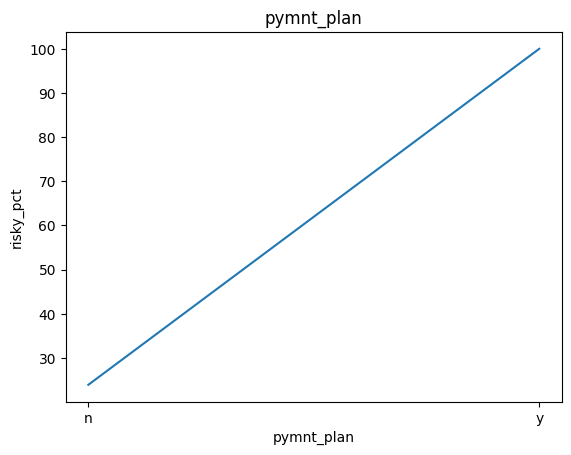

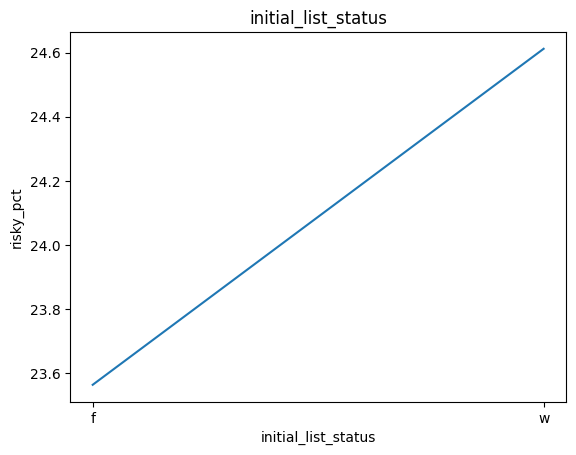

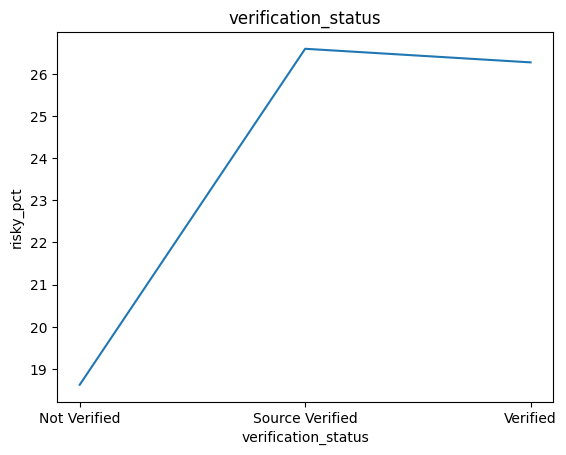

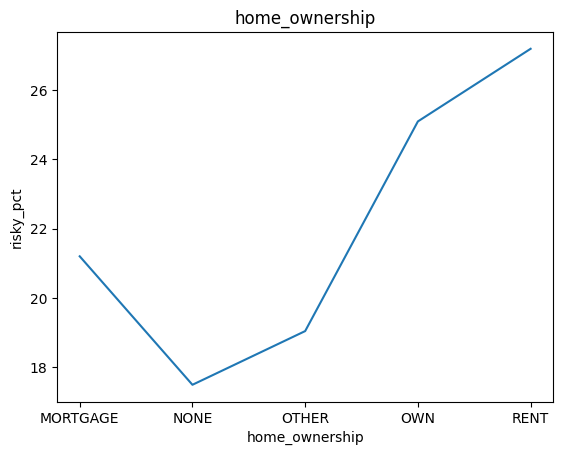

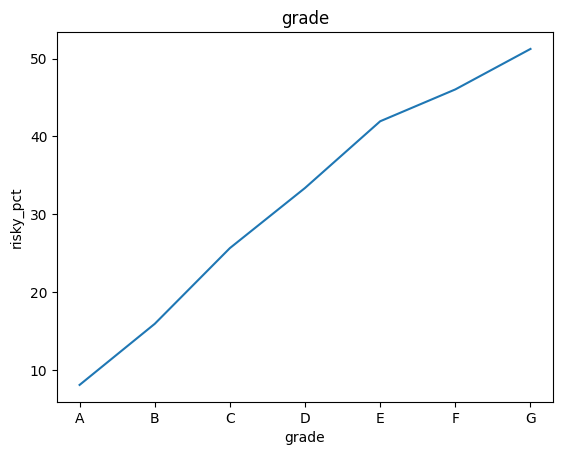

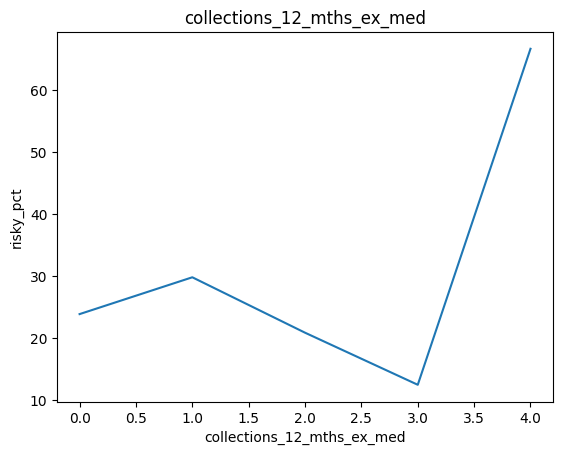

In [139]:
small_unique = ['term', 'pymnt_plan', 'initial_list_status',
       'verification_status', 'home_ownership', 'grade',
       'collections_12_mths_ex_med']

for cols in small_unique:
    risk_pct_chart(cols)

kesimpulan kolom dengan perubahan signifikan rasio 'good' vs 'bad' antara lain:
'term'
'pymnt_plan'
'initial_list_status'
'grade

kolom dengan sedikit perubahan rasio antara lain:

home ownership
verification status
initial_list_status
collections_12_mths_ex_med
Tapi semuanya bagus, dan bisa dipertahankan, karena setidaknya berkontribusi sesuatu, baik itu kecil atau besar.

In [140]:
#buang data yang masih tidak dibutuhkan
drop_col = ['emp_title', 'url', 'title', 'member_id', 'issue_d','issue_date', 'earliest_cr_line' ]
df3.drop(drop_col, inplace=True, axis = 1)

# Numerical vs categorical

In [141]:
# numerical
num_data = df3.select_dtypes(exclude= 'object')
num_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_earliest_cr_line', 'mths_since_issue_date'],
      dtype='object')

In [142]:
# categorical
cat_data = df3.select_dtypes(include= 'object')
cat_data.columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state',
       'initial_list_status', 'loan_ending'],
      dtype='object')

Yang Akan kita lakukan selanjutnya adalah untuk 

#numerikal data

1. Melihat distribusi dengan membuat histogram

2. Melihat Korrelasi

3. Kemudian membuat pivot terhadap variabel target

#kategorikal data

1. Melihat balance

2. Membuat pivot

# Numerical data

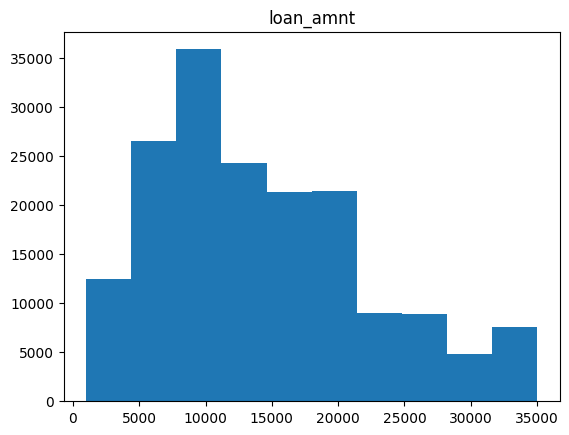

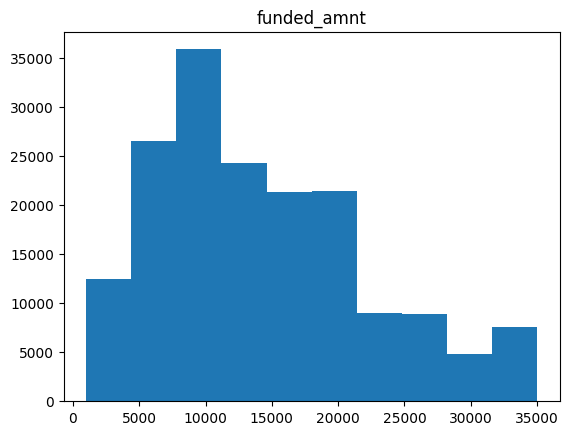

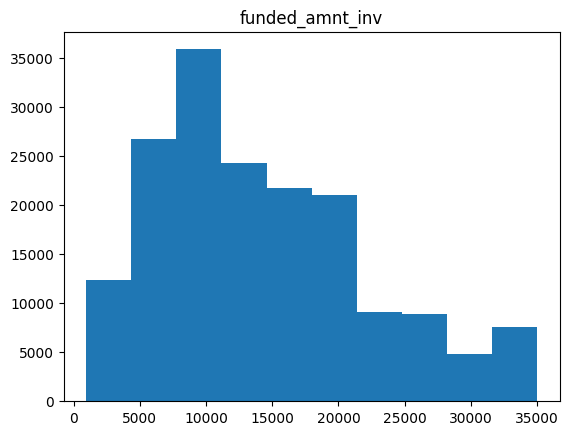

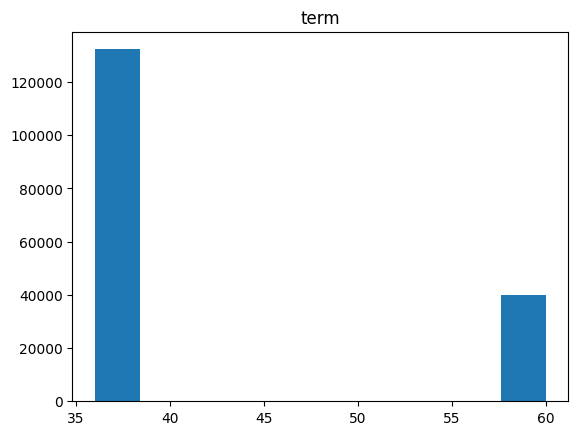

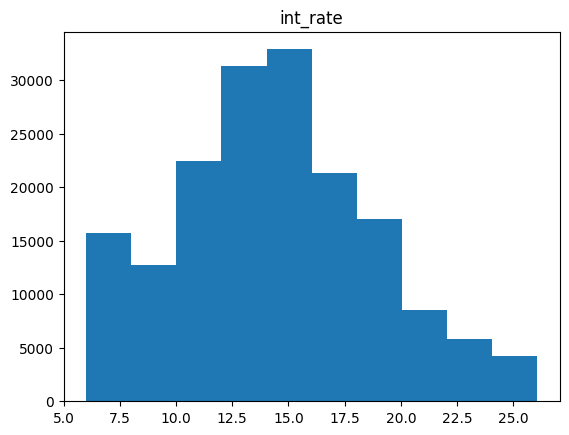

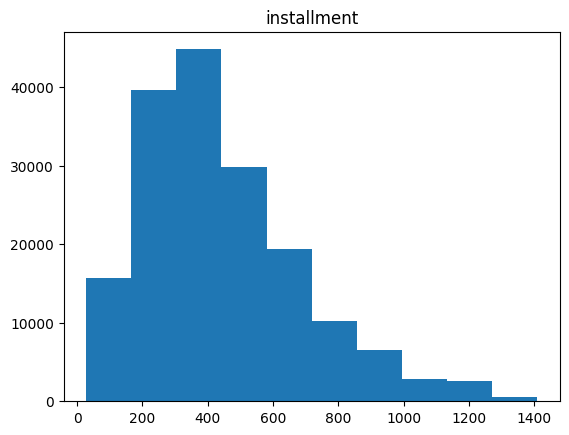

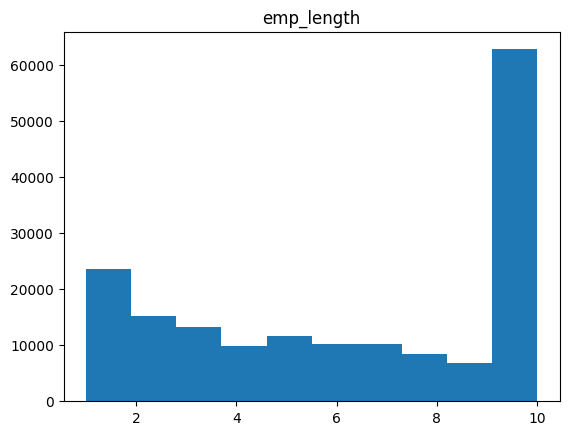

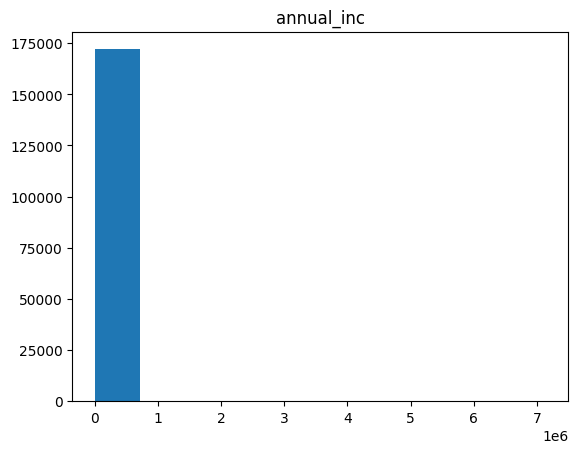

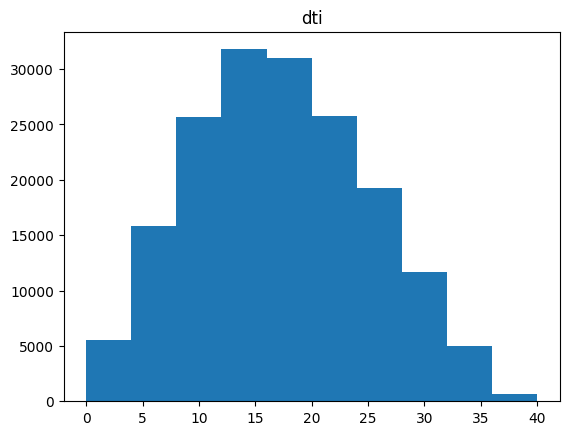

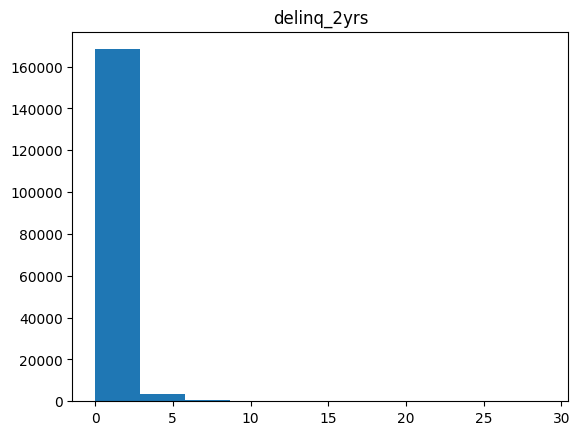

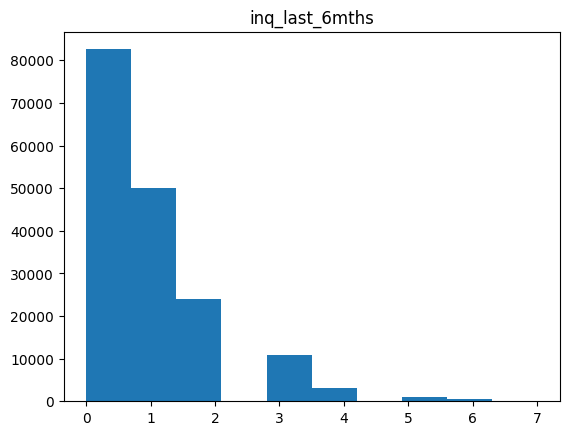

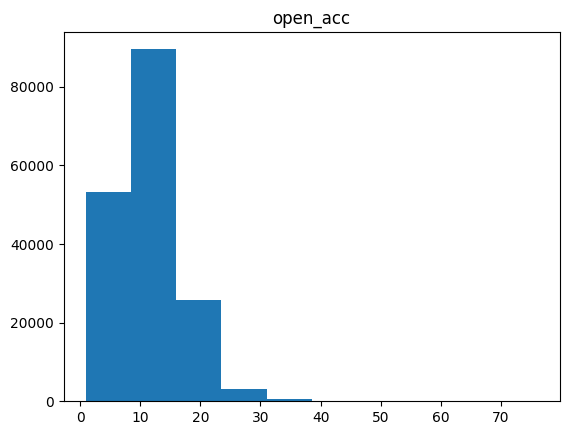

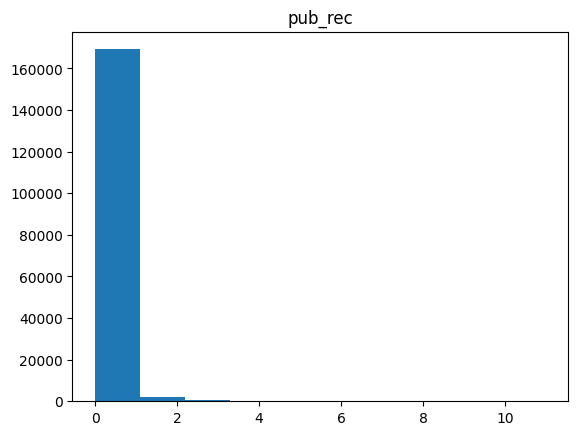

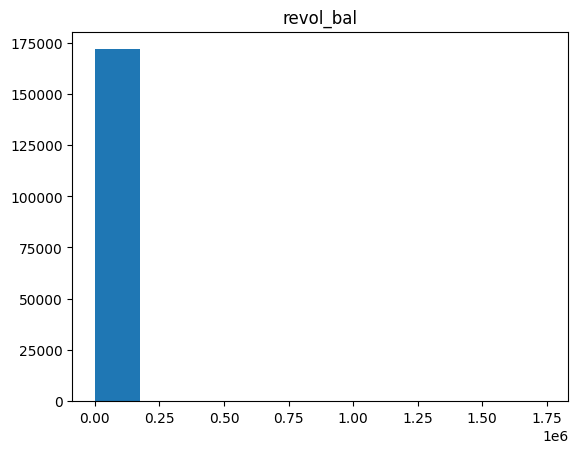

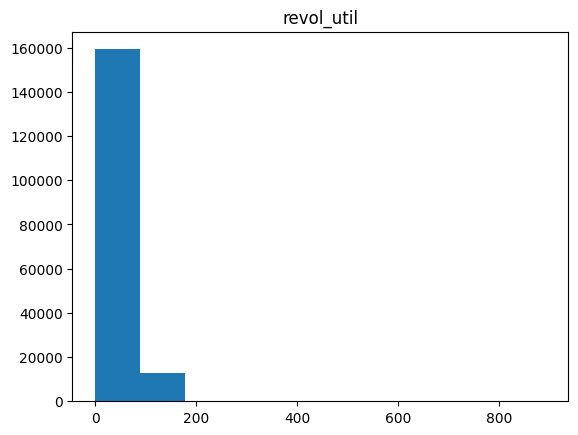

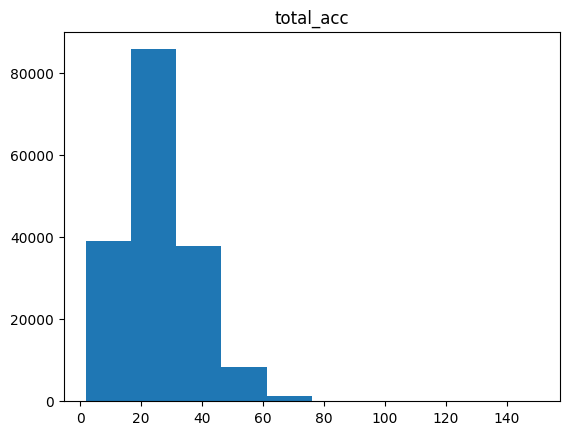

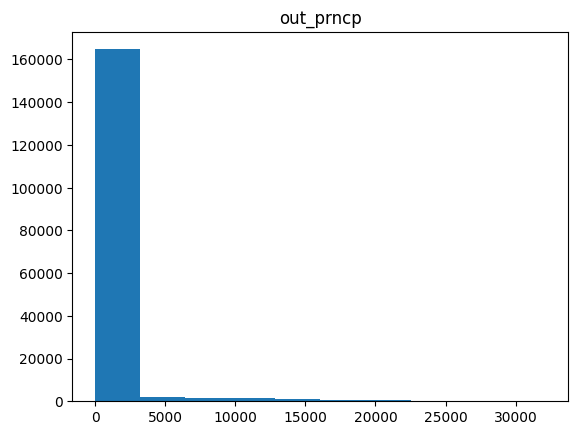

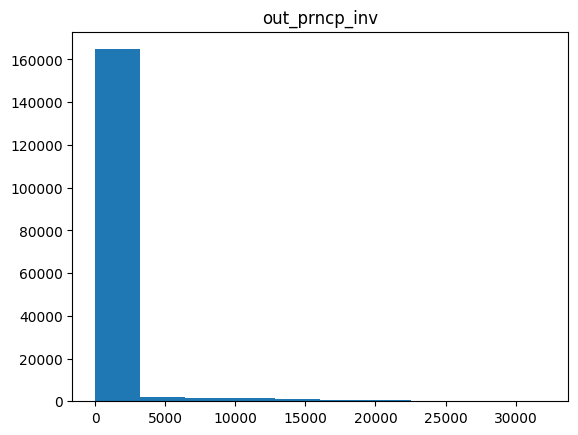

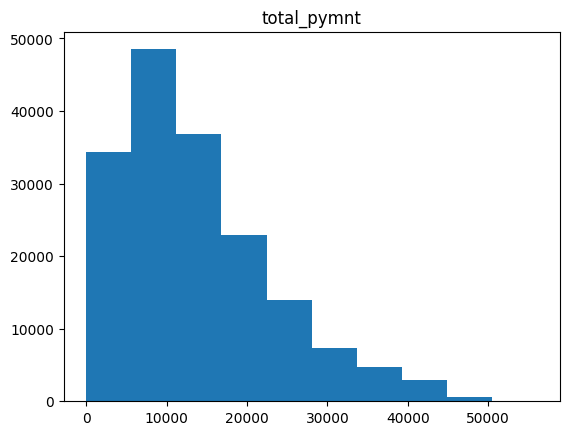

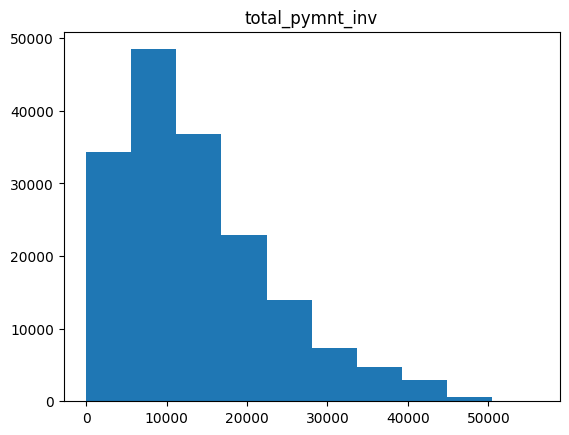

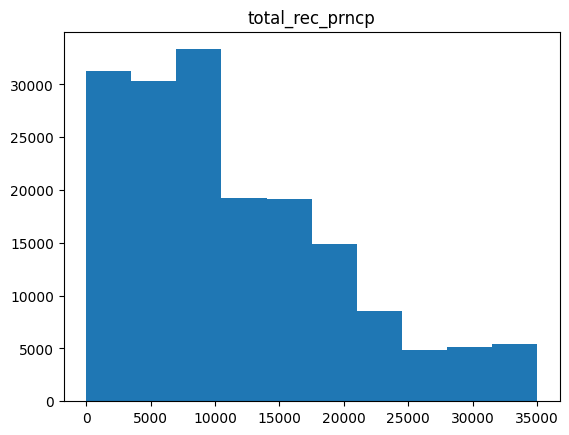

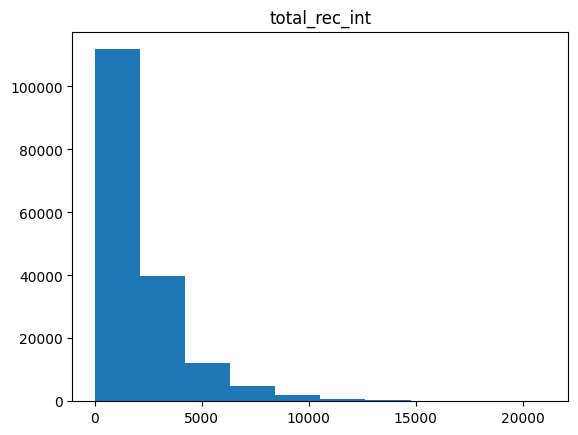

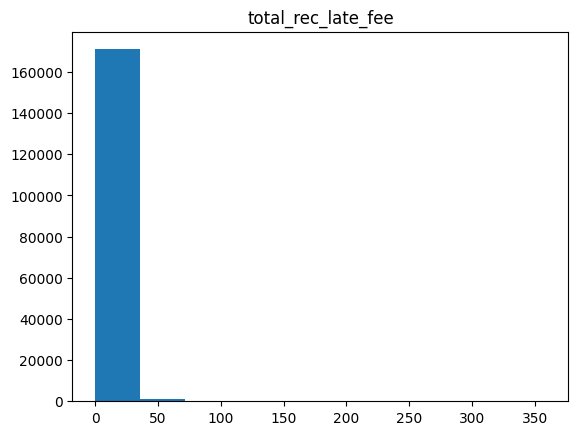

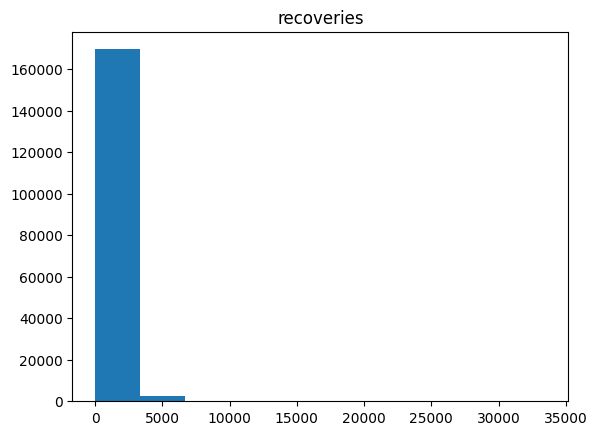

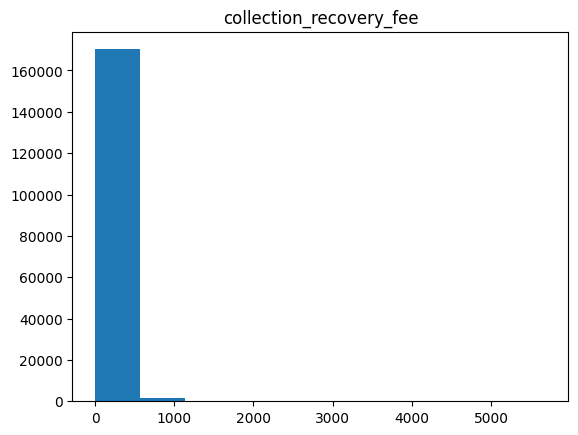

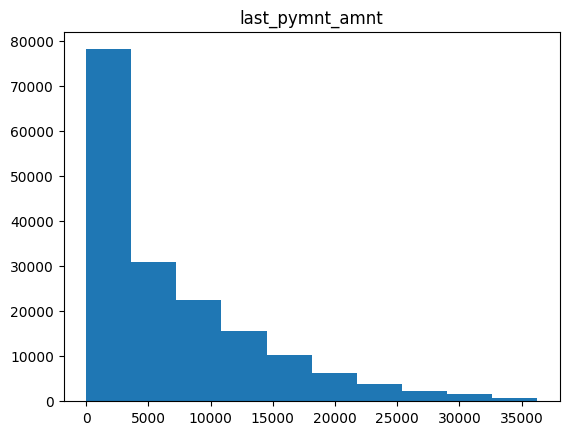

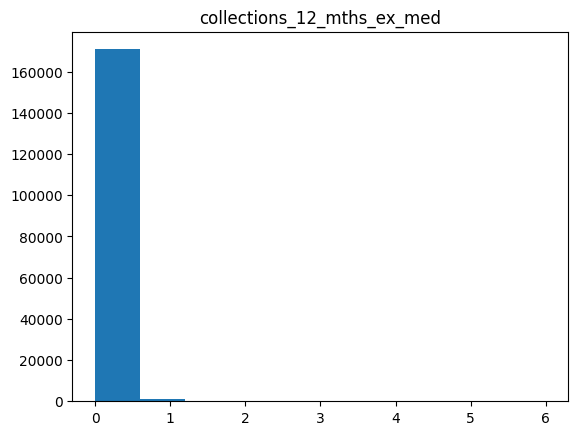

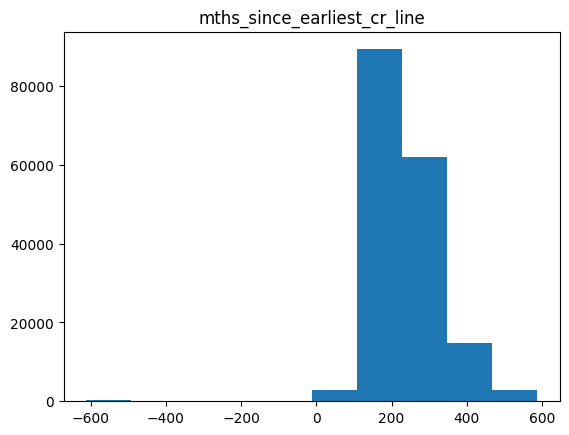

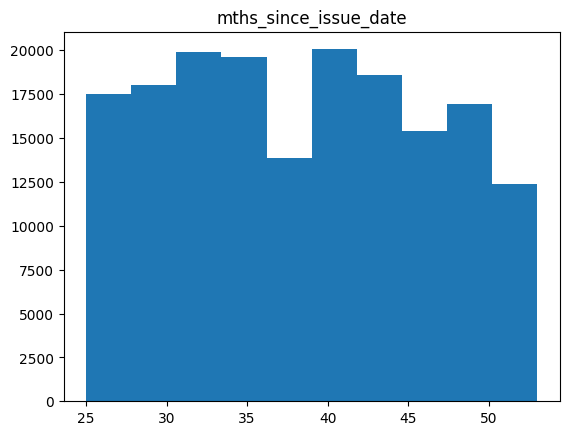

In [143]:
# 1. distribution
for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

In [144]:
#2. Pivot
pd.pivot_table(df3, index = 'loan_ending', values = num_data.columns)

,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,...,recoveries,revol_bal,revol_util,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
loan_ending,,,,,,,,,,,,,,,,,,,,,
bad,66307.401017,80.836508,0.009901,0.322105,19.124398,6.271143,15095.889655,15089.428653,0.966001,460.138952,...,771.627238,15264.496081,59.980996,44.566894,24.956172,6924.986253,6921.819504,2432.833845,2.685606,3717.839567
good,75416.645734,0.000000,0.007713,0.273715,16.698700,6.287919,13936.658076,13929.015168,0.850538,435.514512,...,0.000000,15741.030286,54.952846,40.611409,26.004292,15933.302043,15924.534205,2012.794098,0.218059,13920.289897


<Axes: >

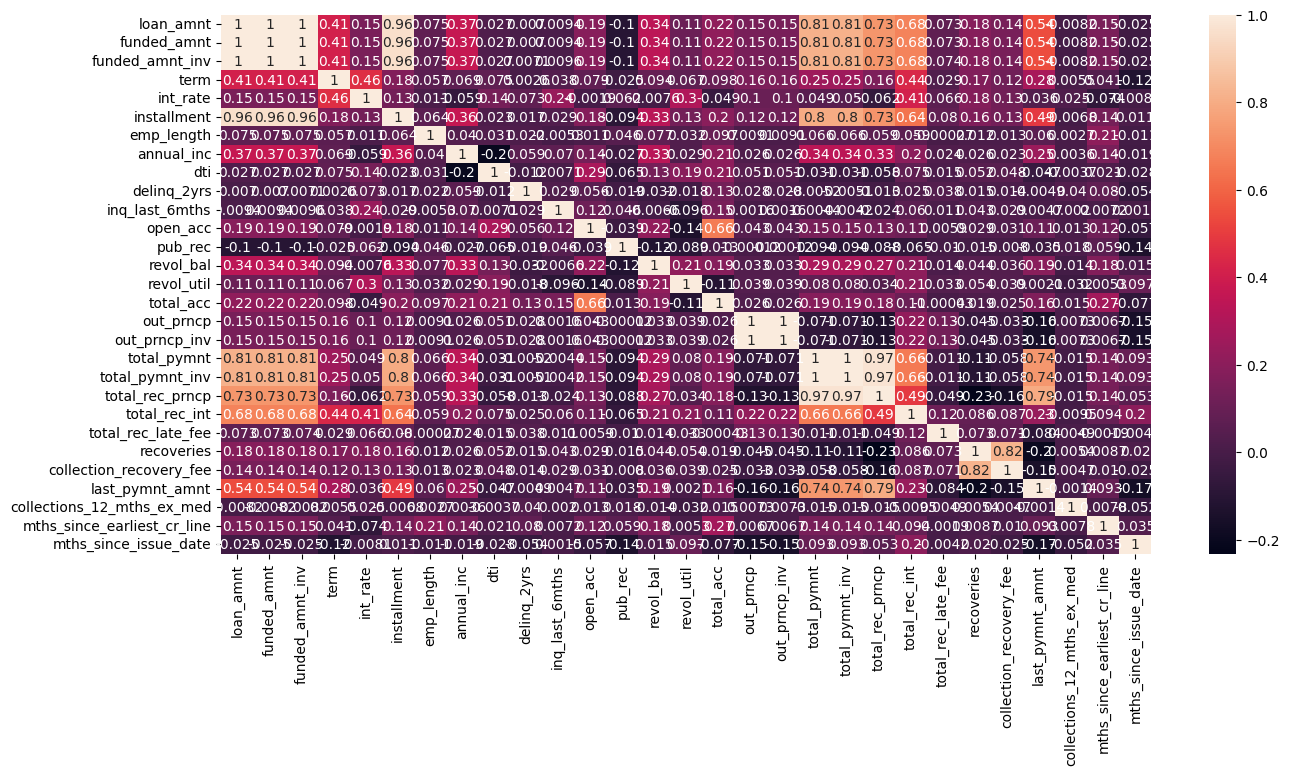

In [145]:
#3. Correlation
plt.figure(figsize=(15,7))
sns.heatmap(data=num_data.corr(), annot=True)

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7, namun karena banyaknya data berada diatas angka 0.8 maka dipilih angka 0.8 untuk tidak membuang terlalu banyak feature

In [146]:
corr_matrix = num_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee']

In [147]:
num_data.drop(to_drop_hicorr, axis=1, inplace=True)

Kesimpulan:

1. Hanya sejumlah kecil data numerik yang terdistribusi secara normal
2. Beberapa data mengandung outlier
3. Seperti yang diharapkan, jumlah angsuran & pinjaman berkorelasi, hampir sempurna. Karena cicilan = jumlah_pinjaman * tingkat_bunga. Meskipun jumlah pinjaman dapat bervariasi, tingkat bunga biasanya tidak terlalu bervariasi.

Berdasarkan tabel pivot, karakteristik pinjaman berisiko:

Berdasarkan catatan pribadi yang buruk:

1. akun delinq yang lebih tinggi
2. kenakalan yang lebih tinggi dalam 2 tahun terakhir
3. pertanyaan yang lebih tinggi dalam 6 bulan terakhir -> pertanyaan sulit dapat memengaruhi penilaian kredit
4. tahun yang lebih rendah sejak pertanyaan terakhir -> lebih rendah = baru-baru ini memiliki pertanyaan kredit
5. Berdasarkan kesulitan pembayaran yang lebih sulit
6. Pendapatan tahunan lebih rendah
7. rasio utang terhadap pendapatan lebih tinggi (dti) -> dti = angsuran bulanan / pendapatan bulanan
8. angsuran & jumlah pinjaman yang lebih tinggi
9. tingkat bunga yang lebih tinggi (biasanya berkorelasi dengan peringkat pinjaman)

# Categorical Data

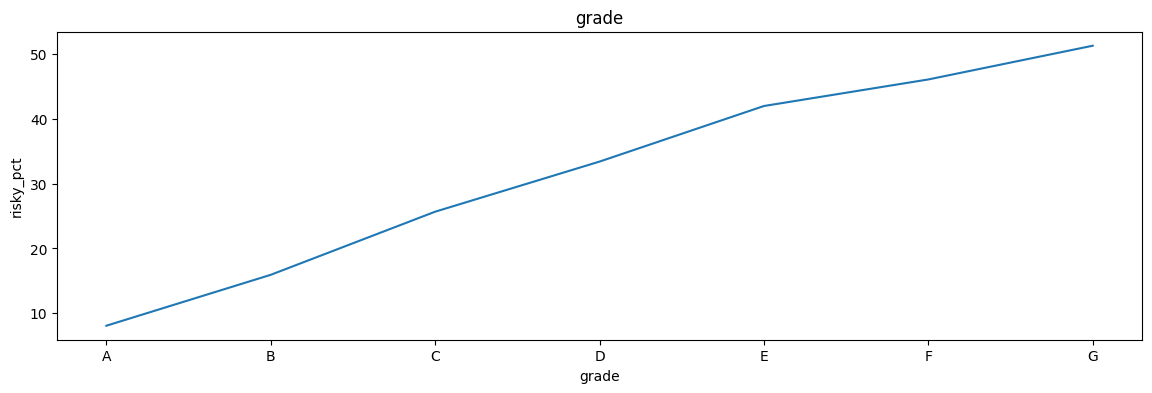

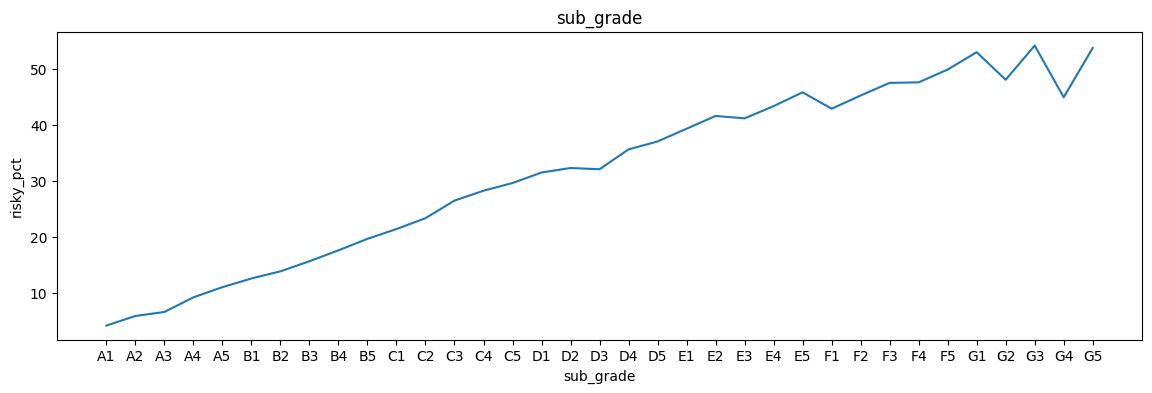

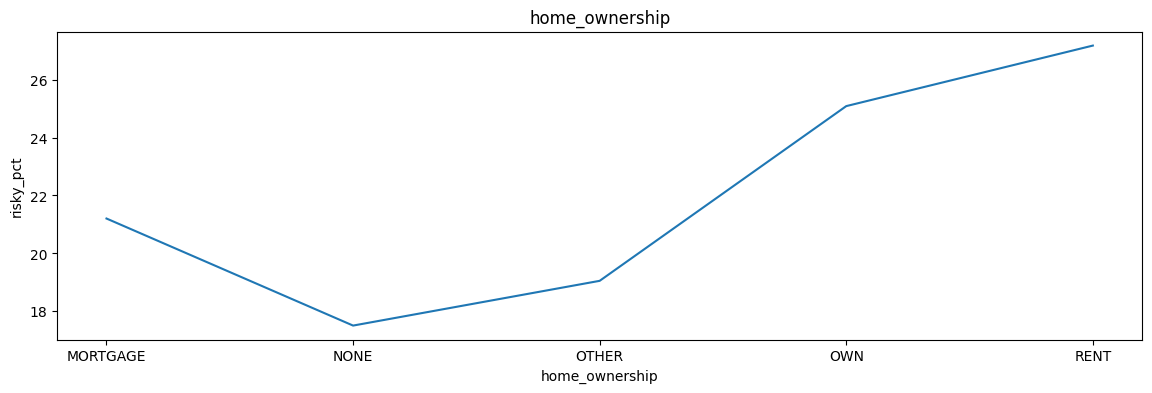

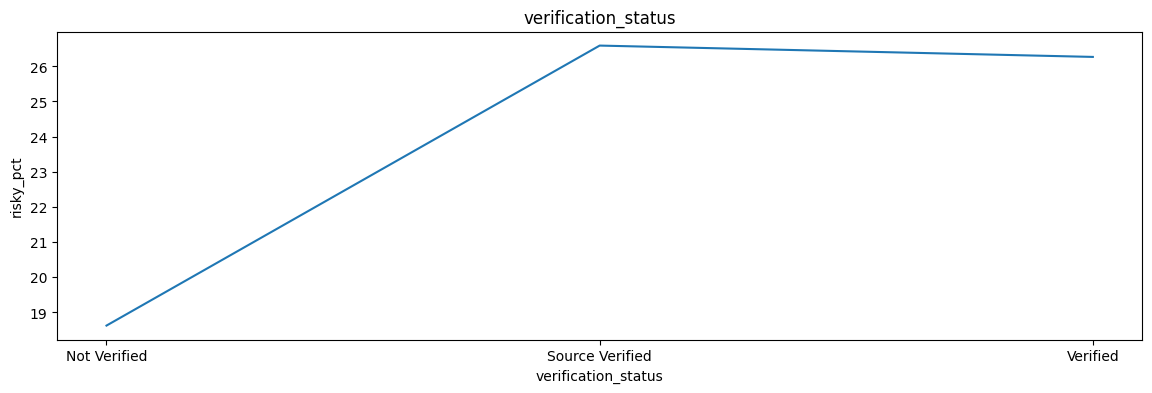

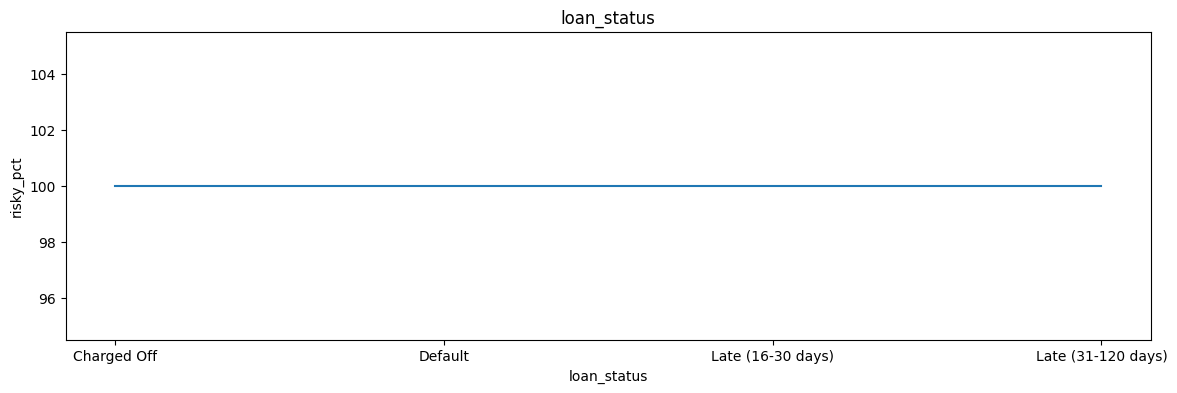

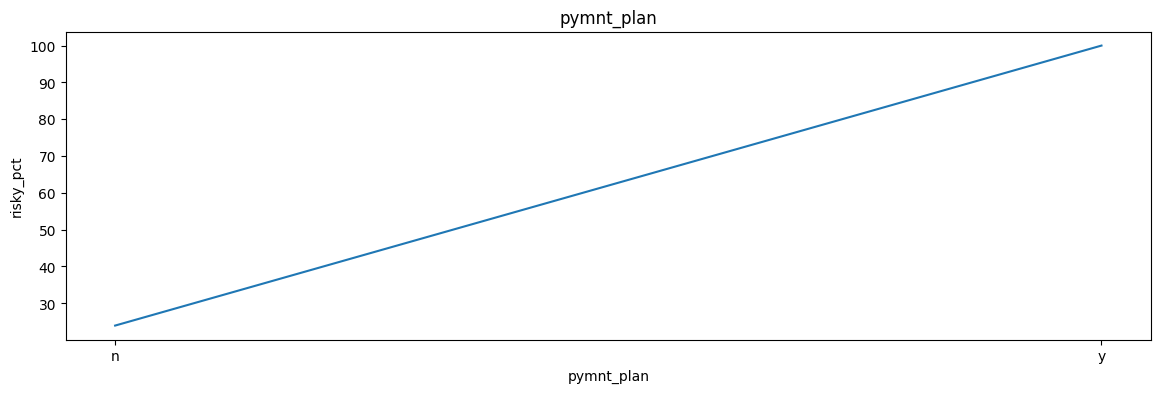

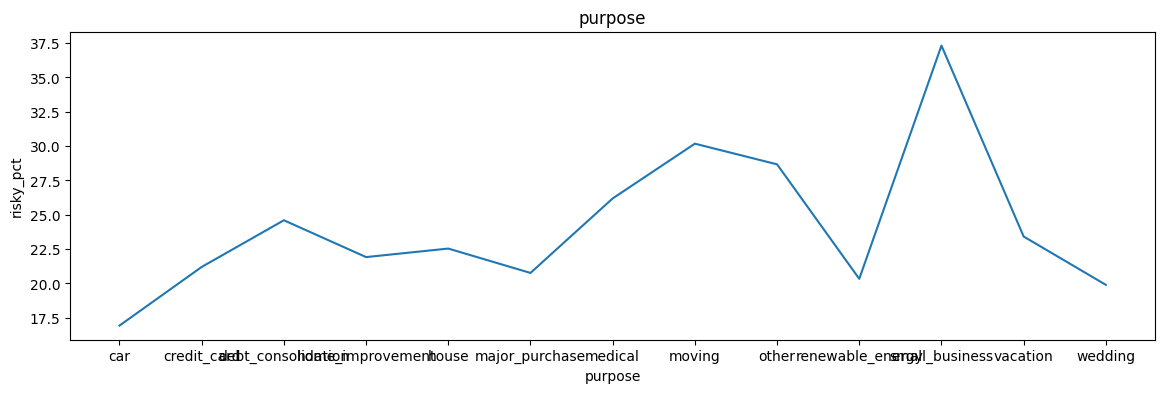

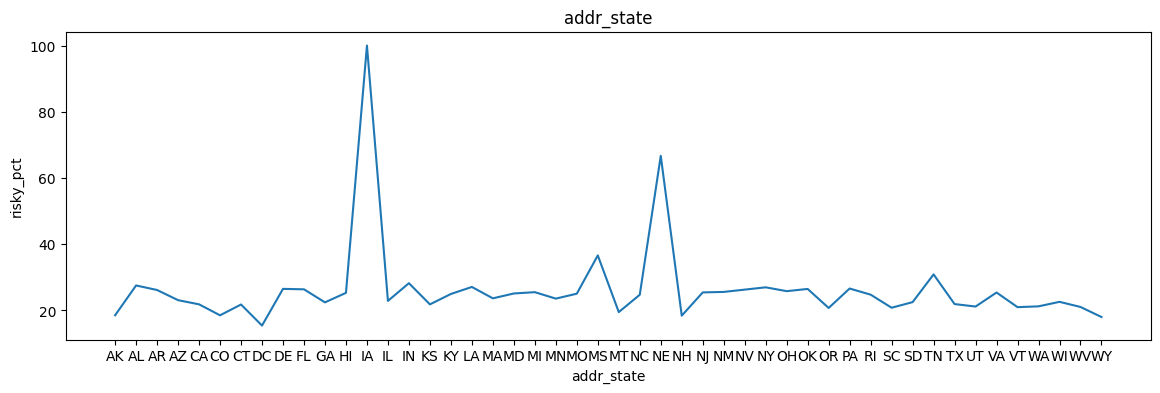

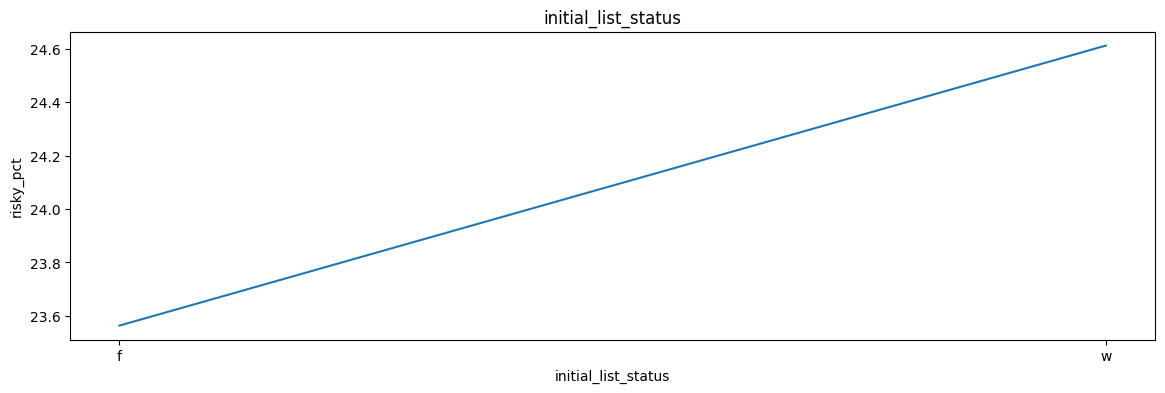

In [148]:
to_chart = ['grade', 'sub_grade', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status']

for cols in to_chart:
    plt.figure(figsize=(14,4))
    risk_pct_chart(cols)

Kesimpulan:

1. Grade dan subgrade sesuai harapan, semakin rendah grade (A-G), semakin berisiko pinjaman
2. Untuk tujuan tertentu, 'mobil', 'pembelian_utama', dan 'pernikahan' memiliki risiko terendah, dan 'usaha_kecil' memiliki risiko tertinggi
3. ni juga menarik bagi negara bagian untuk memiliki persentase risiko yang bervariasi.
4. Bagaimanapun, kita akan mengubah semua data kategorikal menjadi data numerik, dan karena grade dan subgrade sama, saya hanya akan menghapus subgrade untuk mengurangi jumlah kolom.

In [149]:
drop_col = ['sub_grade']
cat_data.drop(drop_col, inplace=True, axis = 1)

In [150]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172157 entries, 42538 to 466283
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    172157 non-null  int64  
 1   funded_amnt                  172157 non-null  int64  
 2   funded_amnt_inv              172157 non-null  float64
 3   term                         172157 non-null  int64  
 4   int_rate                     172157 non-null  float64
 5   installment                  172157 non-null  float64
 6   grade                        172157 non-null  object 
 7   sub_grade                    172157 non-null  object 
 8   emp_length                   172157 non-null  float64
 9   home_ownership               172157 non-null  object 
 10  annual_inc                   172157 non-null  float64
 11  verification_status          172157 non-null  object 
 12  loan_status                  172157 non-null  object 


# Inilah yang akan kita lakukan untuk kategorikal data

1. Untuk 'grade' kita akan menggunakan ordinal encoder atau map
2. dan one hot encoding  untuk:

home_ownership

verification status

purpose

addr_state

initial_list_status

initial_list_status -> tetapi hanya 1 yang cukup jadi kita akan menjatuhkan 1 kolom dummy

In [151]:
cat_data.columns

Index(['grade', 'home_ownership', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status',
       'loan_ending'],
      dtype='object')

In [152]:
cat_data['grade'].unique()

array(['B', 'A', 'E', 'C', 'D', 'F', 'G'], dtype=object)

In [153]:
# 1. transforming grade
grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}

cat_data['grade'] = cat_data['grade'].map(grade_map)

In [154]:
cat_data.grade.unique()

array([2, 1, 5, 3, 4, 6, 7], dtype=int64)

In [155]:
# 3. one hot encode?
to_dummies = ['home_ownership', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status']

dummies = pd.get_dummies(cat_data[to_dummies])
dummies.drop('initial_list_status_w', axis=1, inplace=True)

In [156]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172157 entries, 42538 to 466283
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   home_ownership_ANY                   172157 non-null  uint8
 1   home_ownership_MORTGAGE              172157 non-null  uint8
 2   home_ownership_NONE                  172157 non-null  uint8
 3   home_ownership_OTHER                 172157 non-null  uint8
 4   home_ownership_OWN                   172157 non-null  uint8
 5   home_ownership_RENT                  172157 non-null  uint8
 6   verification_status_Not Verified     172157 non-null  uint8
 7   verification_status_Source Verified  172157 non-null  uint8
 8   verification_status_Verified         172157 non-null  uint8
 9   loan_status_Charged Off              172157 non-null  uint8
 10  loan_status_Default                  172157 non-null  uint8
 11  loan_status_Fully Paid             

In [157]:
dummies.columns

Index(['home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'loan_status_Charged Off', 'loan_status_Default',
       'loan_status_Fully Paid', 'loan_status_Late (16-30 days)',
       'loan_status_Late (31-120 days)', 'pymnt_plan_n', 'pymnt_plan_y',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA',

In [158]:
# buang kolom yang sudah ada OHC
cat_data.drop(to_dummies, axis=1, inplace=True)

In [159]:
# gabung data dengan data kategorikal
cat_data_final = pd.concat([cat_data, dummies], axis = 1)
cat_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172157 entries, 42538 to 466283
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   grade                                172157 non-null  int64 
 1   loan_ending                          172157 non-null  object
 2   home_ownership_ANY                   172157 non-null  uint8 
 3   home_ownership_MORTGAGE              172157 non-null  uint8 
 4   home_ownership_NONE                  172157 non-null  uint8 
 5   home_ownership_OTHER                 172157 non-null  uint8 
 6   home_ownership_OWN                   172157 non-null  uint8 
 7   home_ownership_RENT                  172157 non-null  uint8 
 8   verification_status_Not Verified     172157 non-null  uint8 
 9   verification_status_Source Verified  172157 non-null  uint8 
 10  verification_status_Verified         172157 non-null  uint8 
 11  loan_status_Charged Of

In [160]:
#gabung data numerik dan kategori
df4 = pd.concat([num_data, cat_data_final], axis = 1).dropna().reset_index().drop('index', axis = 1)
df4.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,12000,36,13.53,10.0,40000.0,16.94,0.0,0.0,7.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,3000,36,12.85,10.0,25000.0,24.68,0.0,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,28000,36,7.62,5.0,325000.0,18.55,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,24000,36,13.53,10.0,100000.0,22.18,0.0,0.0,14.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,8000,36,10.99,2.0,33000.0,15.75,0.0,1.0,9.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [161]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [162]:
df4['loan_ending'] = labelencoder.fit_transform(df4['loan_ending'])

In [163]:
#pisah variable dependent (y), dependent(X)
X = df4.drop('loan_ending', axis = 1)
y = df4['loan_ending']

In [164]:
df3.loan_ending.unique()

array(['good', 'bad'], dtype=object)

In [165]:
df4.loan_ending.unique()

array([1, 0])

# Modelling

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137725, 101), (34432, 101), (137725,), (34432,))

# Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier
# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [170]:
rfc = RandomForestClassifier(max_depth=1)
rfc.fit(X_train, y_train)
pred_y = rfc.predict(X_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04      8156
           1       0.77      1.00      0.87     26276

    accuracy                           0.77     34432
   macro avg       0.88      0.51      0.45     34432
weighted avg       0.82      0.77      0.67     34432



In [171]:
from sklearn.metrics import accuracy_score
#Evaluate Model Performance
print('Training Accuracy :', rfc.score(X_train, y_train))  
print('Testing Accuracy :', rfc.score(X_test, y_test))

Training Accuracy : 0.7644436376837902
Testing Accuracy : 0.7675127788104089


In [172]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending= False,)
df_all_features.head(10)

,feature,importance
33,loan_status_Fully Paid,0.10
17,last_pymnt_amnt,0.10
31,loan_status_Charged Off,0.08
16,recoveries,0.07
21,grade,0.06
15,total_rec_late_fee,0.05
35,loan_status_Late (31-120 days),0.05
13,out_prncp,0.04
32,loan_status_Default,0.04
5,dti,0.04


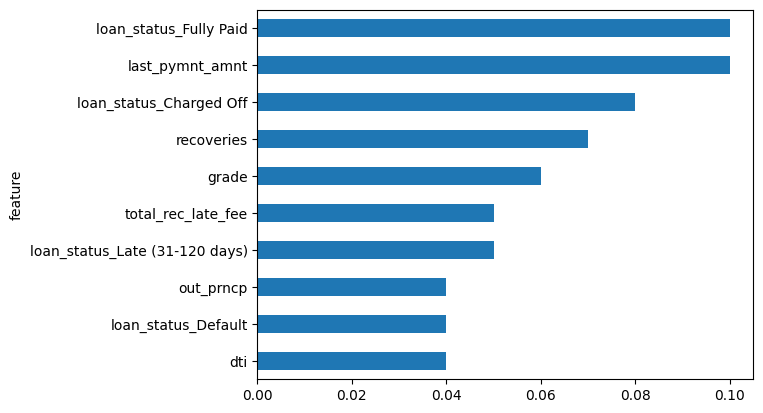

In [173]:
df_all_features.head(10).groupby(["feature"]).importance.mean().sort_values(ascending=True).plot.barh()
plt.show()

In [174]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

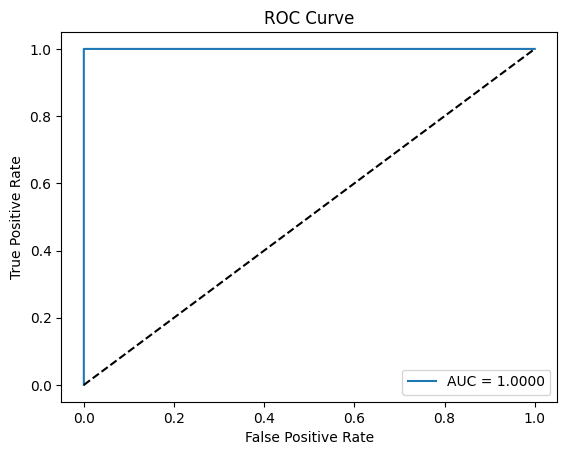

In [175]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Hyperparameter Turning Using RandomizedSearchCV

In [176]:
from sklearn.model_selection import RandomizedSearchCV 

In [177]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [178]:
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [179]:
rfc_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [180]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rfc_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}  



In [181]:
rfbest = [{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}]

In [182]:
rfbest = pd.DataFrame(rfbest)
rfbest.to_csv('rfbest_param.csv')

Menggunakan parameter terbaik

In [183]:
rfc_best = RandomForestClassifier(n_estimators = 20, min_samples_split = 10, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 10, bootstrap=True) 
rfc_best.fit( X_train, y_train) 

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=20)

In [184]:
pred_y_best = rfc_best.predict(X_test)
print(classification_report(y_test, pred_y_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8156
           1       1.00      1.00      1.00     26276

    accuracy                           1.00     34432
   macro avg       1.00      1.00      1.00     34432
weighted avg       1.00      1.00      1.00     34432



In [185]:
from sklearn.metrics import accuracy_score

print('Training Accuracy :', rfc_best.score(X_train, y_train))  
print('Testing Accuracy :', rfc_best.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


Model Accuracy on Test Data: 1.0


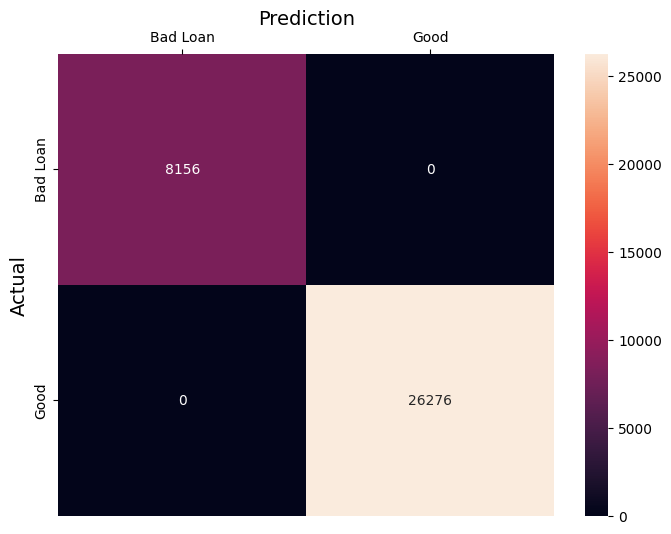

In [186]:
y_pred = rfc_best.predict(X_test)
accuracy = accuracy_score(y_test, pred_y_best)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(y_test, pred_y_best)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = pred_y_best), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['Bad Loan','Good'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['Bad Loan','Good'])
plt.show()

# Kesimpulan 
Dengan penggunaan Algoritma Random Forest:  
Hasil yang didapatkan adalah jumlah Loan_ending/portofolia akan terdiri dari 76.3% pinjaman bagus dan 23.6% pinjaman berisiko, dan sebaiknya Anda akan berinvestasi dalam 100% dari pinjaman bagus yang tersedia.